In [1]:
cd "nilm data\all"

D:\jjenko\nilm data\all


In [2]:
from nilmtk import DataSet
from nilmtk.utils import print_dict
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nilmtk


from nilmtk import DataSet, MeterGroup
import h5py
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.image import RecurrencePlot

plt.style.use('ggplot')
rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,30))

#dataset = DataSet('refit.h5')

refit = DataSet('refit.h5')
ukdale = DataSet('ukdale.h5')
eco = DataSet('eco.h5')
redd = DataSet('redd.h5')
iawe = DataSet('iawe.h5')

#dataset.set_window(start='2011-1-17T1800',end='2011-9-18T1900')
#dataset.set_window(start='2012-9-17T1800',end='2012-11-18T1900')b
#manualy_selected_appliances = ['freezer','washer dryer','washing machine','dish washer','computer','television','electric space heater']
#date_range = pd.date_range("2013-10-10T0000", "2015-8-20T0000",freq=f'{step_in_mins}''T') #max 2014-9


<Figure size 720x2160 with 0 Axes>

In [5]:
iawe.buildings[1].elec.submeters().meters

[ElecMeter(instance=3, building=1, dataset='iAWE', appliances=[Appliance(type='fridge', instance=1)]),
 ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)]),
 ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)]),
 ElecMeter(instance=6, building=1, dataset='iAWE', appliances=[Appliance(type='washing machine', instance=1)]),
 ElecMeter(instance=7, building=1, dataset='iAWE', appliances=[Appliance(type='computer', instance=1)]),
 ElecMeter(instance=8, building=1, dataset='iAWE', appliances=[Appliance(type='clothes iron', instance=1)]),
 ElecMeter(instance=9, building=1, dataset='iAWE', appliances=[Appliance(type='unknown', instance=1)]),
 ElecMeter(instance=10, building=1, dataset='iAWE', appliances=[Appliance(type='television', instance=1)]),
 ElecMeter(instance=11, building=1, dataset='iAWE', appliances=[Appliance(type='wet appliance', instance=1)]),
 ElecMeter(instance=12, 

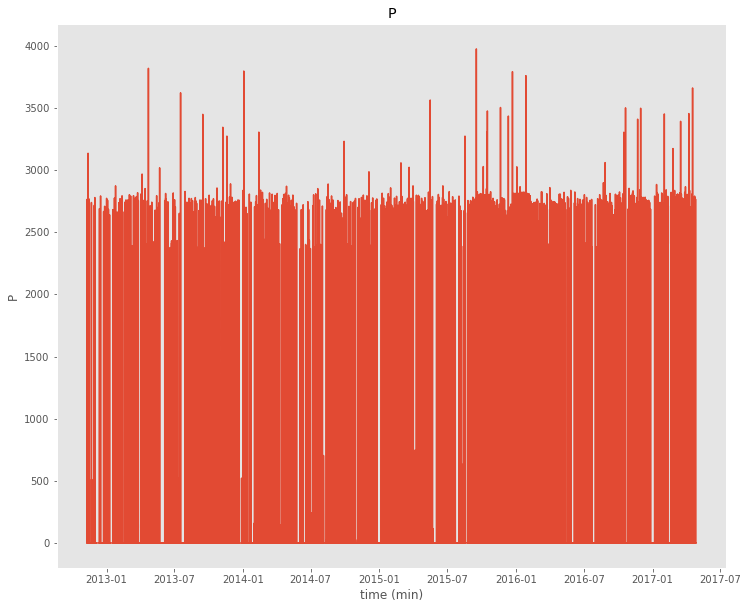

In [17]:
eco.set_window("2012-1-10T0000", "2013-1-1T0000")

meter =  ukdale.buildings[1].elec.submeters().meters[4] # 5 fridge 
 
#appl.available_columns()
df = next(meter.load(physical_quantity='power'))
 #df = df.power.active #for iawe
fig, ax = plt.subplots()
ax.plot(df.fillna(0))

ax.set(xlabel='time (min)', ylabel='P', title='P')
ax.grid()

#df.power.active[1900:1950]

In [22]:
df.power.active.values.transpose()

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [21]:
df.power.values.transpose()

<function ndarray.transpose>

In [18]:
df

physical_quantity,power
type,active
2012-11-09 22:28:18+00:00,1.0
2012-11-09 22:28:24+00:00,1.0
2012-11-09 22:28:30+00:00,1.0
2012-11-09 22:28:36+00:00,1.0
2012-11-09 22:28:42+00:00,1.0
...,...
2017-04-26 18:35:04+01:00,1.0
2017-04-26 18:35:10+01:00,1.0
2017-04-26 18:35:16+01:00,1.0


In [5]:
def printLog(*args, **kwargs):
    #print(*args, **kwargs)
    with open('D:/jjenko/nilm data/GAF_DS/uptime_parser_output.txt','a') as file:
        print(*args, **kwargs, file=file)

In [12]:
datasets = [refit, eco, redd, iawe, ukdale]
datasets = [ukdale]
printLog("starting parsing uptime.....","\n")
printLog("data_list = [","\n")
data_list = []
for dataset in datasets:
    n_buildings = len(dataset.buildings)

    for building in range(n_buildings):
        building+=1
        
        for meter in dataset.buildings[building].elec.submeters().meters:
            
            appliance_metadata = meter.appliances[0].metadata

            label = appliance_metadata.get("type")
            instance = appliance_metadata.get("instance")

            print("dataset: ",dataset.metadata["name"]," building: ",building," label: ",label," instance: ",instance, "")
            #printLog("dataset: ",dataset.metadata["name"]," building: ",building," label: ",label," instance: ",instance, "")
            
            print("calulating length... ")
            #printLog("calulating length... ")
            df = next(meter.load(physical_quantity='power'))
            ts = df.power.values.transpose()[0]
            ts_on = ts[ts > 20]
            ts_on_len = len(ts_on)
            print("length",ts_on_len)
            #printLog("length",ts_on_len)

            

            data_list.append([dataset.metadata["name"],building,label,instance,ts_on_len])
            printLog(data_list,",","\n")
            

printLog("]","\n")
            

dataset:  UK-DALE  building:  1  label:  boiler  instance:  1 
calulating length... 
length 3211102
dataset:  UK-DALE  building:  1  label:  solar thermal pumping station  instance:  1 
calulating length... 
length 4254460
dataset:  UK-DALE  building:  1  label:  laptop computer  instance:  1 
calulating length... 
length 1337346
dataset:  UK-DALE  building:  1  label:  washer dryer  instance:  1 
calulating length... 
length 851439
dataset:  UK-DALE  building:  1  label:  dish washer  instance:  1 
calulating length... 
length 528414
dataset:  UK-DALE  building:  1  label:  television  instance:  1 
calulating length... 
length 2273173
dataset:  UK-DALE  building:  1  label:  light  instance:  1 
calulating length... 
length 2930131
dataset:  UK-DALE  building:  1  label:  HTPC  instance:  1 
calulating length... 
length 4867154
dataset:  UK-DALE  building:  1  label:  kettle  instance:  1 
calulating length... 
length 130409
dataset:  UK-DALE  building:  1  label:  toaster  instance:

In [58]:
datasets = [refit, eco, redd, iawe, ukdale]


data_list = []
for dataset in datasets:
    print(dataset.metadata['meter_devices']['smart_meter']["sample_period"])
           
            

KeyError: 'smart_meter'

In [ ]:
refit.buildings[1].elec.submeters().meters

[ElecMeter(instance=2, building=1, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)]),
 ElecMeter(instance=3, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)]),
 ElecMeter(instance=4, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=2)]),
 ElecMeter(instance=5, building=1, dataset='REFIT', appliances=[Appliance(type='washer dryer', instance=1)]),
 ElecMeter(instance=6, building=1, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)]),
 ElecMeter(instance=7, building=1, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)]),
 ElecMeter(instance=8, building=1, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)]),
 ElecMeter(instance=9, building=1, dataset='REFIT', appliances=[Appliance(type='television', instance=1)]),
 ElecMeter(instance=10, building=1, dataset='REFIT', appliances=[Appliance(type='electric space heater', instance=1)])]

In [86]:
manualy_selected_appliances = ["freezer", "fridge", "kettle", "washing macihne", "coffee maker", "computer"]
dataset = refit
data_list = []
for appliance in manualy_selected_appliances:
    
    for building in dataset.buildings:
       
        for meter in dataset.buildings[building].elec.submeters().meters:
            
            appliance_metadata = meter.appliances[0].metadata

            label = appliance_metadata.get("type")
            instance = appliance_metadata.get("instance")

            if label != appliance : continue

            if instance == 2 : label=label+str(instance)
             
            print("dataset: ",dataset.metadata["name"]," building: ",building," label: ",label," instance: ",instance, "")
    

In [ ]:
labels = []
for meter in meters:
    appliance_metadata = meter.appliances[0].metadata
    labels.append(appliance_metadata.get("type"))
    

NameError: name 'meters' is not defined

In [13]:
appliances = []
for sublist in data_list:
    appliances.append(sublist[2])

appliance_set = set(appliances)
appliances_unique = list(appliance_set)

df = pd.DataFrame(data_list)

num_instances = []
acc_lenght = []
for appliance in appliance_set:
    num_instances.append(sum(sublist.count(appliance) for sublist in data_list))
    acc_lenght.append(sum(df.loc[df[2]==appliance][4]))

df2 = pd.DataFrame({"names":appliances_unique, "instances":num_instances,"length":acc_lenght})
   

In [14]:
df2.sort_values(by="instances",ascending=False)

,names,instances,length
48,light,15,9861973
30,kettle,5,172594
35,laptop computer,4,2099697
49,computer monitor,4,3203552
38,desktop computer,3,2551053
41,television,3,2590025
12,microwave,3,1804223
17,dish washer,3,618881
5,toaster,3,106651
7,boiler,2,3753032


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
print("parsed_data = [")
for row in range(len(appliances_unique)):
    print("['",appliances_unique[row],"',",num_instances[row],",",acc_lenght[row],"],")
    

print("]")

In [ ]:
df2.sort_values(by=2,ascending=False)

,0,1,2
9,freezer,18,66054453
3,fridge freezer,17,44222574
69,fridge,20,42416005
46,television,25,37973296
60,computer,18,35179868
22,HTPC,6,23379655
11,light,34,12133088
21,laptop computer,9,7807734
28,audio system,7,6944925
10,microwave,26,6237136


In [ ]:
datasets=df[0].unique()

In [ ]:
dataset_names = []
leng = []
n_build = []

for dataset in datasets:
    dataset_names.append(dataset)
    leng.append(df.loc[df[0]==dataset][4].sum())
    n_build.append(df.loc[df[0]==dataset][1].max())
    
    
df_dataset = pd.DataFrame({"names":dataset_names, "leng":leng,"n_build":n_build})

In [ ]:
df_dataset.sort_values(by="leng",ascending=False)

,names,leng,n_build
0,REFIT,144341850,20
1,ECO,130187888,6
4,UK-DALE,54997820,5
3,iAWE,6425055,1
2,REDD,5890953,6
